# Let's Explore Some Telco Churn Data

Data can be found here WA_Fn-UseC_-Telco-Customer-Churn.csv: https://community.watsonanalytics.com/wp-content/uploads/2015/03/WA_Fn-UseC_-Telco-Customer-Churn.csv

# What’s in the Telco Customer Churn data set?
This data set provides info to help you predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

A telecommunications company is concerned about the number of customers leaving their landline business for cable competitors. They need to understand who is leaving. Imagine that you’re an analyst at this company and you have to find out who is leaving and why.

The data set includes information about:
* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

# If you don’t have the data set…
Go to https://community.watsonanalytics.com/resources/
* Download the Telco Customer Churn sample data file.
* In Watson Analytics, tap Add and upload Telco Customer Churn.
* The filename is a bit longer: WA_Fn-UseC_-Telco-Customer-Churn.csv.


# Choose interactive or inline plotting

In [16]:
#%matplotlib notebook
%matplotlib inline

In [17]:
import pandas as pd
import numpy as np
# Added to support multiple environments
nimbix = True
if(nimbix) :
    churn = pd.read_csv('/data/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')
else :
    churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

#churn.info()

# Handy Utilities

In [18]:
from itertools import compress
from churnlab_utils import pdutil_describeItemRange
from churnlab_utils import pdutil_factorize
from churnlab_utils import pdutil_OneHotEncode
from churnlab_utils import pdutil_dbscan
        





# One Approach to Outliers (DBSCAN Visualization)

Control the **colors** by the **cluster** they are in

Get a feel for clsutering behavior

We added the cluster number to the dataframe so we can drill down as needed to examine a cluster in more detail.

When we create the model we might decide to take advantage of our feature engineering here or we might decide to let the ML/DL algorithm use all the data to make predictions.

**NOTE:** Be careful with relying on the cluster number. These were established by random selection. So each time we run we may get a different cluster number for what humans percieve as a clsuter or the k-means may find different clusters entirely. Specifying a random seed or using a different cluster methods, such SOM may make this part more rubust.

It would be great if we coudl isolate the different communities from each other and see if this effects the chrun prediction

For dbscan, when looking for outliers, I adjust the eps value to find a way to have a small number of clusters and the Outlier cluster (index = -1) be  on the order of 1% or 2% of the total number of observations





In [19]:
import pandas as pd
pcomps = pd.read_pickle("churnlab_pcomps")
churn_encoded_numeric = pd.read_pickle("churnlab_churn_encoded_numeric")
churn_scaled = pd.read_pickle("churnlab_churn_scaled")

Hint : Changing the number of pca components to base dbscan upon causes the dbscan to be senstive to the eps or cluster distance parameter.  Some experiemtnation is needed to find a set of parameters that give a lower number of outliers (category = -1 returned from dbscan).  The inital values used here place almost all instances into cluster -1 or the outlier class.
    
    
Exercise : Find the a combination of number_of_eigens and eps that yeilds 3 to 5 clusters and the outlier cluster containinf a manageble number like 100 or so instances in the outlier class.  
    
 <div class="panel-group" id="accordion-11">

  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-11" href="#collapse1-11">
        Hint 1</a>
      </h4>
    </div>
    <div id="collapse1-11" class="panel-collapse collapse">
      <div class="panel-body"> Change number_of_eigens to be less 3 or more and less than 12. The eps has to be larger for more dimensions or components.</div>
    </div>
  </div>
  
  <div class="panel panel-default">
    <div class="panel-heading">
      <h4 class="panel-title">
        <a data-toggle="collapse" data-parent="#accordion-11" href="#collapse1-12">
        Hint 2</a>
      </h4>
    </div>
    <div id="collapse1-12" class="panel-collapse collapse">
      <div class="panel-body"> try number_of_eigens = 10 and eps close to 4 </div>
    </div>
  </div>
  
</div>  

eps:4 Estimated number of clusters: 2
Outliers: 0:   Estimated number of clusters: 2


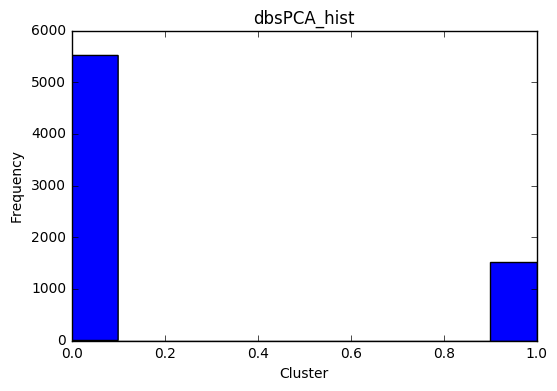

In [64]:
### import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

X = pcomps

# experiment with the vlaues below
number_of_eigens = 4
eps = 4
# just experiment with numbers above for now

subset_cols = X.columns[:number_of_eigens] 
lst = subset_cols.tolist()

pcomps, labels, n_clusters = pdutil_dbscan(X[lst], eps)  

dbsPCA_hist = pcomps.dbsPCA
print('Outliers: {}:   Estimated number of clusters: {}'.format(  dbsPCA_hist.tolist().count(-1),  n_clusters) )
plt.hist( dbsPCA_hist)
plt.title("dbsPCA_hist")
plt.xlabel("Cluster")
plt.ylabel("Frequency")
#plt.axis([-1,n_clusters,0,7200])
plt.show()

## Copying the dcscan column info for convenience

In [35]:
#churn_encoded_numeric = pd.concat([churn_encoded_numeric, pcomps['dbsPCA']], axis=1)

churn_encoded_numeric.head()


,Contract0,Contract1,Contract2,Dependents0,Dependents1,DeviceProtection0,DeviceProtection1,DeviceProtection2,InternetService0,InternetService1,...,TechSupport1,TechSupport2,gender0,gender1,SeniorCitizen,MonthlyCharges,tenure,TotalCharges,Churn,dbsPCA
0,1,0,0,1,0,1,0,0,1,0,...,0,0,1,0,0,29.85,1,29.85,0,0
1,0,1,0,1,0,0,1,0,1,0,...,0,0,0,1,0,56.95,34,1889.50,0,1
2,1,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,53.85,2,108.15,1,1
3,0,1,0,1,0,0,1,0,1,0,...,1,0,0,1,0,42.30,45,1840.75,0,0
4,1,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,70.70,2,151.65,1,1


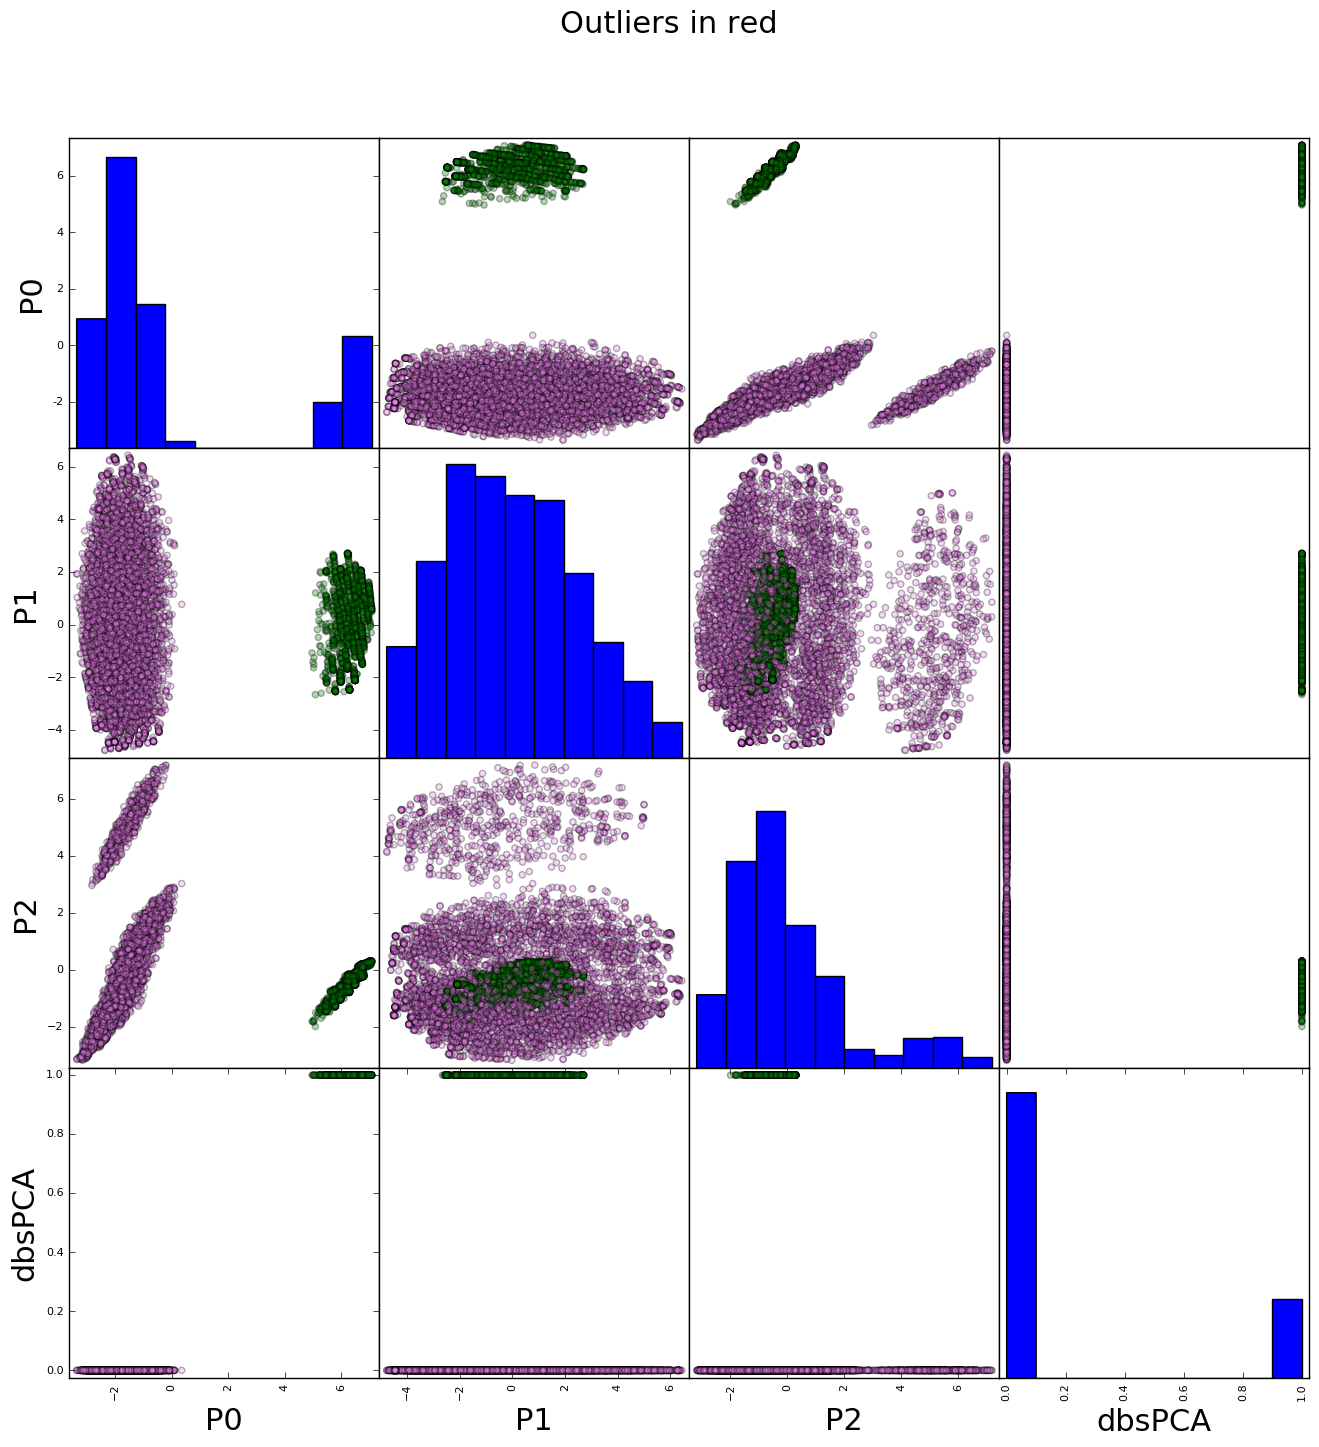

In [36]:
# Figure 2
# plot each cluster a different color so we can see what cluster number is associated with each blob
from pandas import scatter_matrix
df2 = pcomps
#df2 = pcomps[pcomps['Churn'] == 1]

#control how many and order of scatter plots to compare
attributes = [0, 1, 2, 3]

# if we generate too many clusters we run out of colors to display them.
colors=['red', 'violet','green','blue', 'yellow', 'black', 'gray', 'white', 'orange']
#dbscan numbers clusters from -1 to some positive number, the negative ones I want to color red, I use lambda to do this
scatter_matrix(df2[attributes],figsize=[16,16],marker='o', alpha=.3, c=df2['dbsPCA'].apply(lambda x:colors[x+1]))
plt.rcParams.update({'font.size': 22})
plt.suptitle("Outliers in red")
plt.show()

In [37]:
churn_encoded_numeric.head()

,Contract0,Contract1,Contract2,Dependents0,Dependents1,DeviceProtection0,DeviceProtection1,DeviceProtection2,InternetService0,InternetService1,...,TechSupport1,TechSupport2,gender0,gender1,SeniorCitizen,MonthlyCharges,tenure,TotalCharges,Churn,dbsPCA
0,1,0,0,1,0,1,0,0,1,0,...,0,0,1,0,0,29.85,1,29.85,0,0
1,0,1,0,1,0,0,1,0,1,0,...,0,0,0,1,0,56.95,34,1889.50,0,1
2,1,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,53.85,2,108.15,1,1
3,0,1,0,1,0,0,1,0,1,0,...,1,0,0,1,0,42.30,45,1840.75,0,0
4,1,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,70.70,2,151.65,1,1


In [38]:
print('Outliers: {} '.format(  dbsPCA_hist.tolist().count(-1)) )
churn_encoded_numeric[churn_encoded_numeric['dbsPCA']<0].describe()

Outliers: 0 


,Contract0,Contract1,Contract2,Dependents0,Dependents1,DeviceProtection0,DeviceProtection1,DeviceProtection2,InternetService0,InternetService1,...,TechSupport1,TechSupport2,gender0,gender1,SeniorCitizen,MonthlyCharges,tenure,TotalCharges,Churn,dbsPCA
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117,117,117,...,117.000000,117,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117
mean,0.008547,0.282051,0.709402,0.324786,0.675214,0.170940,0.829060,0,1,0,...,0.829060,0,0.538462,0.461538,0.068376,54.902564,56.940171,3165.519235,0.008547,-1
std,0.092450,0.451934,0.455991,0.470309,0.470309,0.378076,0.378076,0,0,0,...,0.378076,0,0.500663,0.500663,0.253476,8.422286,17.850090,1147.878626,0.092450,0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,...,0.000000,0,0.000000,0.000000,0.000000,29.900000,0.000000,305.550000,0.000000,-1
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0,1,0,...,1.000000,0,0.000000,0.000000,0.000000,49.850000,48.000000,2317.100000,0.000000,-1
50%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0,1,0,...,1.000000,0,1.000000,0.000000,0.000000,56.400000,65.000000,3281.650000,0.000000,-1
75%,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0,1,0,...,1.000000,0,1.000000,1.000000,0.000000,60.800000,71.000000,4122.650000,0.000000,-1
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0,1,0,...,1.000000,0,1.000000,1.000000,1.000000,67.200000,72.000000,4919.700000,1.000000,-1


# Examine Outliers Statistics Like This

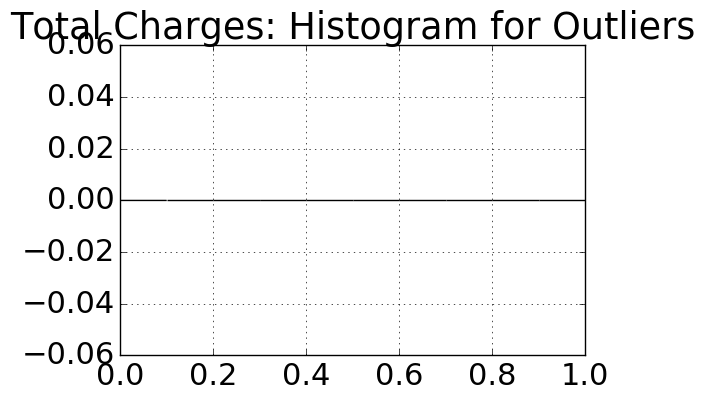

In [39]:
#churn_encoded_numeric[pcomps['dbsPCA']<0].head()
if 'Churn' not in churn_encoded_numeric.columns:
    churn_encoded_numeric = pd.concat([churn_encoded_numeric, label], axis=1)  # add numeric to main df
churn_encoded_numeric[pcomps['dbsPCA']<0]

plt.title('Total Charges: Histogram for Outliers')
Outliers = churn_encoded_numeric[pcomps['dbsPCA']<0]['TotalCharges']
Outliers.hist()

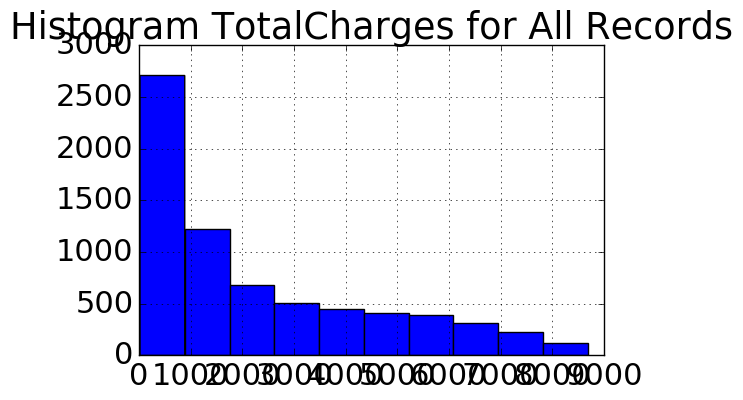

In [40]:
plt.title('Histogram TotalCharges for All Records')
GeneralPop = churn_encoded_numeric['TotalCharges']
GeneralPop.hist()

In [41]:
churn_encoded_numeric[pcomps['dbsPCA']<0].describe()

,Contract0,Contract1,Contract2,Dependents0,Dependents1,DeviceProtection0,DeviceProtection1,DeviceProtection2,InternetService0,InternetService1,...,TechSupport1,TechSupport2,gender0,gender1,SeniorCitizen,MonthlyCharges,tenure,TotalCharges,Churn,dbsPCA
count,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
churn_encoded_numeric.describe()

,Contract0,Contract1,Contract2,Dependents0,Dependents1,DeviceProtection0,DeviceProtection1,DeviceProtection2,InternetService0,InternetService1,...,TechSupport1,TechSupport2,gender0,gender1,SeniorCitizen,MonthlyCharges,tenure,TotalCharges,Churn,dbsPCA
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.550192,0.209144,0.240664,0.700412,0.299588,0.439443,0.343888,0.216669,0.343746,0.439585,...,0.290217,0.216669,0.495244,0.504756,0.162147,64.761692,32.371149,2283.300441,0.265370,1.103223
std,0.497510,0.406726,0.427517,0.458110,0.458110,0.496355,0.475038,0.412004,0.474991,0.496372,...,0.453895,0.412004,0.500013,0.500013,0.368612,30.090047,24.559481,2265.000258,0.441561,0.593915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,18.800000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,9.000000,402.225000,0.000000,1.000000
50%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,70.350000,29.000000,1400.550000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,89.850000,55.000000,3786.600000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,72.000000,8684.800000,1.000000,2.000000


# Modeling

## Split Data - Training/Test

Splitting the data can be a very easy thing but its also easy to get into trouble.

We want to ensure that in subsequent runs we never contaminate the test set from run to run. Using a random seed help something like randseed = 42

But if we ever drop or add rows, and then use the same random selection we will likely wind up putting a new value into our test set inadvertantly.

It would be best to split the data based on some invariant such as a hask of column names or some other unique row identifier. But for now we take the easy random split approach.

In [43]:
# to make this notebook's output identical at every run
np.random.seed(42)
# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

churn_encoded_numeric
#churn_scaled = pd.concat([churn_cat['customerID'], churn_encoded_numeric], axis=1)
churn_scaled.head()
if ( len(churn_scaled.customerID.unique()) ==  len(churn_encoded_numeric)) : print "Unique Identifier"

train_set, test_set = split_train_test(churn_scaled, 0.2)


Unique Identifier


# First Model - Decision Tree

Use churn_scaled dataframe which is a more minimally processed version of our raw data - all numeric, but no pca at this point.

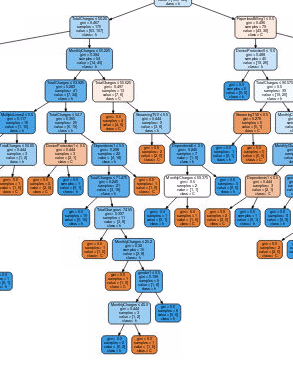

In [44]:
train_set.head()

,customerID,Contract0,Contract1,Contract2,Dependents0,Dependents1,DeviceProtection0,DeviceProtection1,DeviceProtection2,InternetService0,...,TechSupport1,TechSupport2,gender0,gender1,SeniorCitizen,MonthlyCharges,tenure,TotalCharges,Churn,dbsPCA
1161,5868-CZJDR,1,0,0,0,1,1,0,0,1,...,0,0,0,1,0,31.35,1,31.35,1,0
2142,4223-BKEOR,0,1,0,0,1,0,1,0,1,...,0,0,1,0,0,64.85,21,1336.80,0,1
1623,6035-RIIOM,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,97.20,54,5129.45,0,1
6074,3797-VTIDR,1,0,0,1,0,1,0,0,1,...,0,0,0,1,0,23.45,1,23.45,1,0
1362,2568-BRGYX,1,0,0,1,0,1,0,0,0,...,0,0,0,1,0,70.20,4,237.95,1,1


In [32]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

X = churn_scaled.drop(u'customerID', axis=1)

clf = DecisionTreeClassifier(random_state=0)
AllCols = X.columns
StaticCols = ['Churn','dbsPCA']

dataCols = (list(set(AllCols) - set(StaticCols)))
clf = clf.fit(train_set[dataCols], train_set['Churn'])
#accuracy = cross_val_score(clf, churn_cat_encode_new2[dataCols], churn_cat_encode_new2['Churn'], cv=10)
predicted = clf.predict(test_set[dataCols])
print accuracy_score(test_set['Churn'], predicted )


from sklearn import tree
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=dataCols,  
                         class_names='Churn',
                         filled=True, rounded=True,  
                         special_characters=True) 
#graph.render("Churn")   #to copy to pdf
graph = graphviz.Source(dot_data) 
graph.render("TreeModel")
#graph   #churners orange, non chutners blue

0.715198863636


'TreeModel.pdf'

# Second Model - Decision Tree on PCA

Ok - this one works even better.  Read up on the advantages and disadvantages of PCA as part of a data pipleine and see if it suitable for your application.  There is no magical single method, everyhting has trade offs, but hopefully you have more information to go off and explore.

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

X = churn_encoded_numeric
clf = DecisionTreeClassifier(random_state=0)
AllCols = X.columns
StaticCols = ['Churn']

dataCols = sorted(list(set(AllCols) - set(StaticCols)))
accuracy = cross_val_score(clf, X[dataCols], X['Churn'], cv=10)
accuracy.mean()

0.7244047145740875